In [8]:
import numpy as np 
import pandas as pd
from sklearn import svm

import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline

import pickle

In [19]:
recipes = pd.read_csv("recipes_muffins_cupcakes.csv")
recipes

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0
5,Muffin,55,27,3,7,5,2,1,0
6,Muffin,54,27,7,5,5,2,0,0
7,Muffin,47,26,10,10,4,1,0,0
8,Muffin,50,17,17,8,6,1,0,0
9,Muffin,50,17,17,11,4,1,0,0


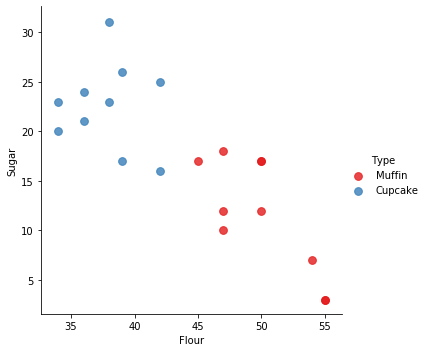

In [9]:
sns.lmplot("Flour","Sugar",data = recipes,hue = "Type",palette = "Set1",fit_reg = False,scatter_kws = {"s":60});

In [20]:
type_label = np.where(recipes["Type"] == "Muffin",0,1)
ingredients = recipes[["Flour","Sugar","Butter","Vanilla"]].values

recipe_features = recipes.columns.values[1:].tolist()
ingredients

array([[55,  3,  7,  0],
       [47, 12,  6,  0],
       [47, 18,  6,  0],
       [45, 17, 17,  0],
       [50, 12,  6,  1],
       [55,  3,  7,  1],
       [54,  7,  5,  0],
       [47, 10, 10,  0],
       [50, 17,  8,  0],
       [50, 17, 11,  0],
       [39, 26, 19,  1],
       [42, 16, 10,  0],
       [34, 20, 20,  1],
       [39, 17, 19,  1],
       [38, 23, 15,  1],
       [42, 25,  9,  0],
       [36, 21, 14,  1],
       [38, 31,  8,  1],
       [36, 24, 12,  1],
       [34, 23, 11,  1]], dtype=int64)

In [21]:
model = svm.SVC(kernel='linear')
model.fit(ingredients, type_label)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [22]:
# Get the separating hyperplane
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(30, 60)
yy = a * xx - (model.intercept_[0]) / w[1]

# Plot the parallels to the separating hyperplane that pass through the support vectors
b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])
model.support_vectors_

array([[47., 12.,  6.,  0.],
       [47., 18.,  6.,  0.],
       [45., 17., 17.,  0.],
       [42., 16., 10.,  0.]])

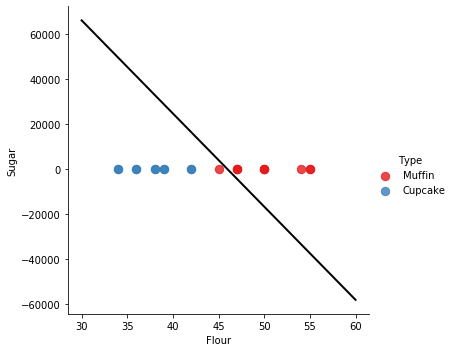

In [23]:
sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')

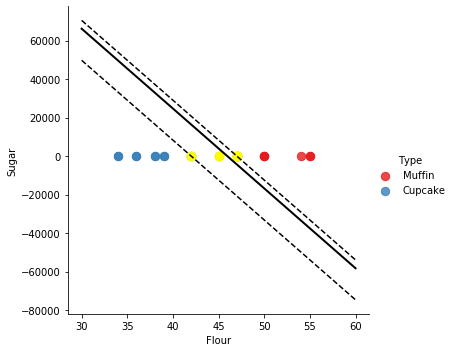

In [24]:
sns.lmplot("Flour","Sugar",data=recipes,hue = "Type",palette="Set1",fit_reg = False,scatter_kws = {"s":70})
plt.plot(xx,yy,linewidth = 2,color = "black")
plt.plot(xx,yy_down,"k--")
plt.plot(xx,yy_up,"k--")
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
          s=80, facecolors='yellow');

In [26]:
def muffin_or_cupcake(flour,sugar,butter,vanilla):
    if(model.predict([[flour,sugar,butter,vanilla]])== 0):
        print("you're lookin' for muffin recipe")
    else:
        print("you're lookin' for cupcake recipe")

In [28]:
muffin_or_cupcake(30,20,3,1)

you're lookin' for cupcake recipe


In [29]:
muffin_or_cupcake(70,20,3,0)

you're lookin' for muffin recipe
